In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error

In [3]:
# Load the dataset
file_path = './btc.csv'
btc_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
btc_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,16/7/2010,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,17/7/2010,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,18/7/2010,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,19/7/2010,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,20/7/2010,0.07474,0.07921,0.06634,0.07921,0.07921,42


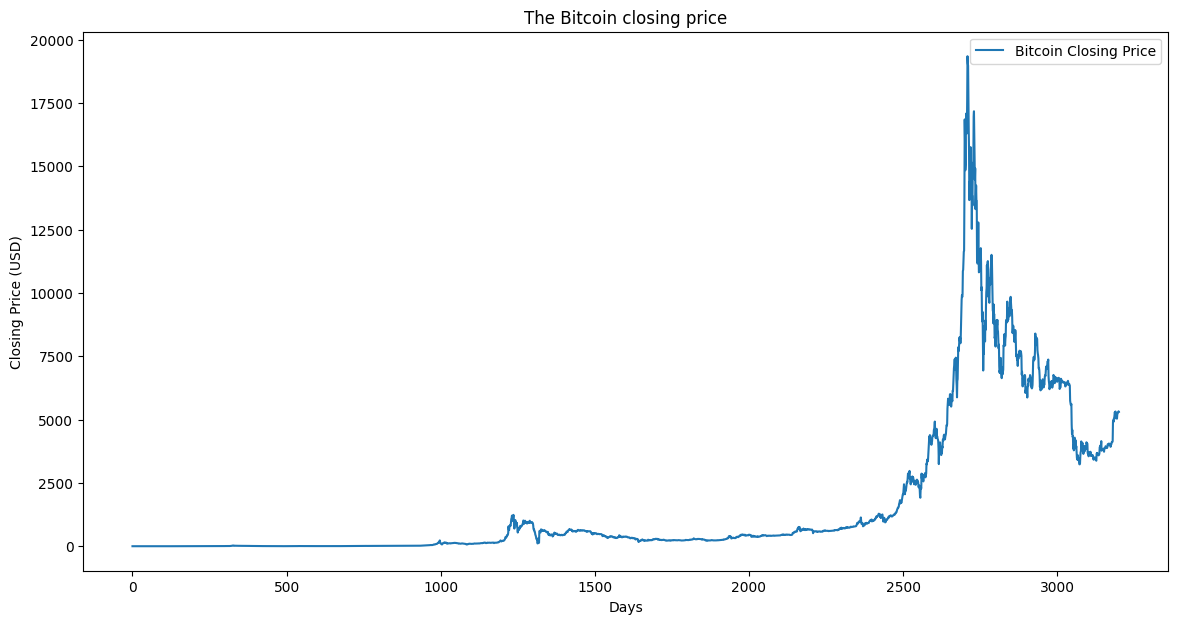

In [4]:
# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='Bitcoin Closing Price')
plt.title('The Bitcoin closing price')
plt.xlabel('Days')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


In [5]:
def window_data(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(btc_data[['Close']].values)

# Define window size
window_size = 7

# Window the data
X, y = window_data(scaled_data, window_size)

# Ensure X and y have the same length
assert len(X) == len(y)


In [5]:
# Split the data into training and test sets (90:10 ratio)
split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape X for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [6]:
# Parameters
memory_cells = [32, 64, 128, 256]
dropout_rate = 0.1
l2_reg = 0.0001
epochs = 20
batch_size = 32
learning_rate = 0.001

# Store results
results = []

# Iterate over different LSTM memory cell sizes
for cells in memory_cells:
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(input_shape=(window_size, 1), units=cells, return_sequences=False,  kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)

    # Evaluate the model on the test set
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    # Append the results
    results.append(test_loss)



C:\Users\MILab\.conda\envs\hr\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


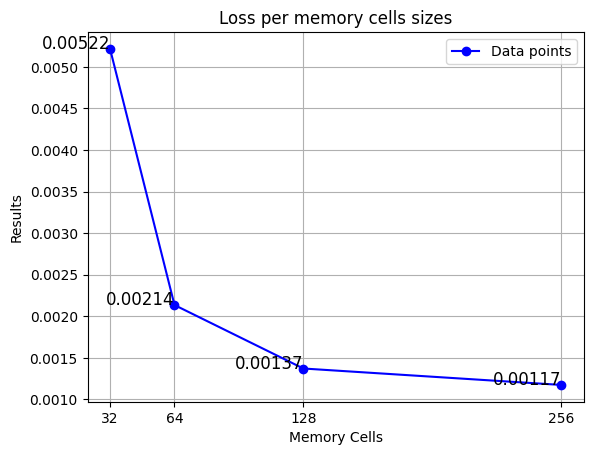

In [7]:
# plot 생성
plt.plot(memory_cells, results, 'bo-', label='Data points')

# 각 포인트 위에 소숫점 둘째 자리까지 값 표시
for i in range(len(results)):
    plt.text(memory_cells[i], results[i], f'{results[i]:.5f}', fontsize=12, ha='right')

# 라벨 및 타이틀 설정
plt.xlabel('Memory Cells')
plt.ylabel('Results')
plt.title('Loss per memory cells sizes')
plt.xticks([32, 64, 128 , 256])
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Parameters
memory_cells = 256
dropout_rate = 0.1
l2_reg = 0.0001
epochs = 20
batch_size = 32
learning_rate = 0.001

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=memory_cells, return_sequences=False, input_shape=(window_size, 1), kernel_regularizer=l2(l2_reg)))
model.add(Dropout(dropout_rate))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Store results
results = []
results.append(test_loss)

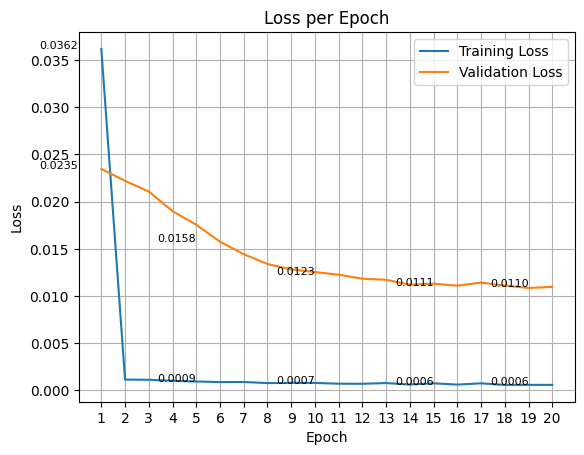

In [9]:
# Plot the training and validation loss
plt.plot(range(1,21),history.history['loss'], label='Training Loss')
plt.plot(range(1,21),history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.xticks(range(1,21))
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_list = history.history['loss']
valloss_list = history.history['val_loss']
# 각 포인트 위에 소숫점 둘째 자리까지 값 표시
for i in range(len(history.history['loss'])):
  if i%5==0 or i ==len(history.history['loss'])-1:
    plt.text(i, history.history['loss'][i], f'{loss_list[i]:.4f}', fontsize=8, ha='right')
    plt.text(i, history.history['val_loss'][i], f'{valloss_list[i]:.4f}', fontsize=8, ha='right')

plt.show()



In [10]:
# Store results
predicted_train_results = {}
predicted_test_results = {}
memory_cells_list = [32, 64, 128, 256]
for memory_cells in memory_cells_list:
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=memory_cells, return_sequences=False, input_shape=(window_size, 1), kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)
    
    # Predict using the model
    predictions = model.predict(X_train)
    predicted_train_results[memory_cells] = predictions.flatten()

# Predict using the model
predictions = model.predict(X_test)
predicted_test_results[256] = predictions.flatten()

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


2874


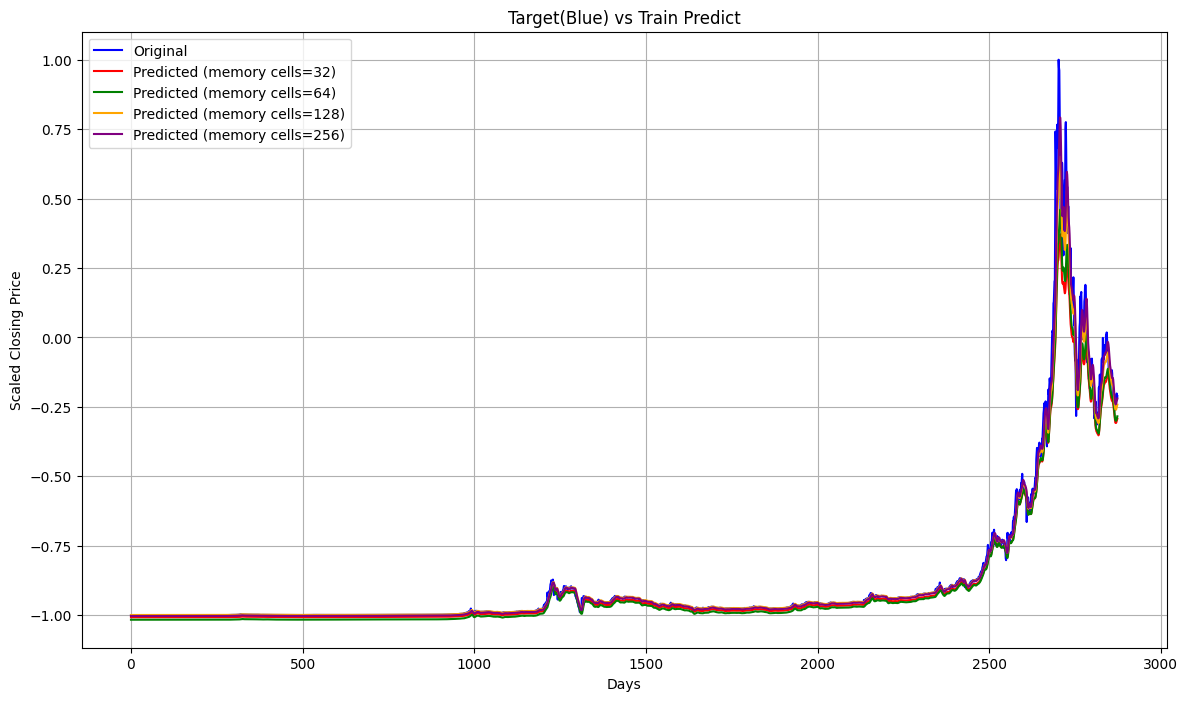

In [11]:
np.random.seed(0)
days = np.arange(2874)
scaled_closing_prices = y_train.flatten()
window_size = 7

# Plot original and predicted values
plt.figure(figsize=(14, 8))
plt.plot(days, scaled_closing_prices, label='Original', color='blue')
print(len(predicted_train_results[memory_cells]))
colors = ['red', 'green', 'orange','purple']
for idx, memory_cells in enumerate(memory_cells_list):
    plt.plot(days, predicted_train_results[memory_cells], label=f'Predicted (memory cells={memory_cells})', color=colors[idx])

plt.title('Target(Blue) vs Train Predict')
plt.xlabel('Days')
plt.ylabel('Scaled Closing Price')
plt.legend()
plt.grid(True)
plt.show()

2874


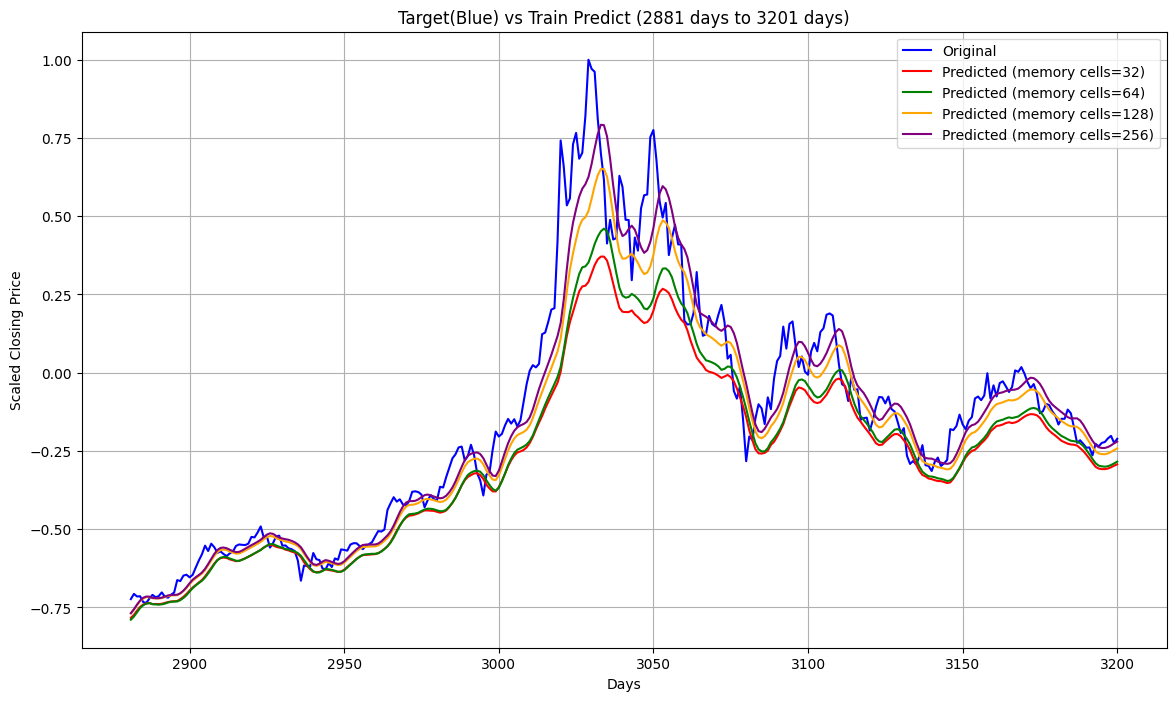

In [12]:
np.random.seed(0)
days = np.arange(2881,3201)
scaled_closing_prices = y_train.flatten()[-320:]

window_size = 7
# Plot original and predicted values
plt.figure(figsize=(14, 8))
plt.plot(days, scaled_closing_prices, label='Original', color='blue')
print(len(predicted_train_results[memory_cells]))
colors = ['red', 'green', 'orange','purple']
for idx, memory_cells in enumerate(memory_cells_list):
    plt.plot(days, predicted_train_results[memory_cells][-320:], label=f'Predicted (memory cells={memory_cells})', color=colors[idx])

plt.title('Target(Blue) vs Train Predict (2881 days to 3201 days)')
plt.xlabel('Days')
plt.ylabel('Scaled Closing Price')
plt.legend()
plt.grid(True)
plt.show()

320


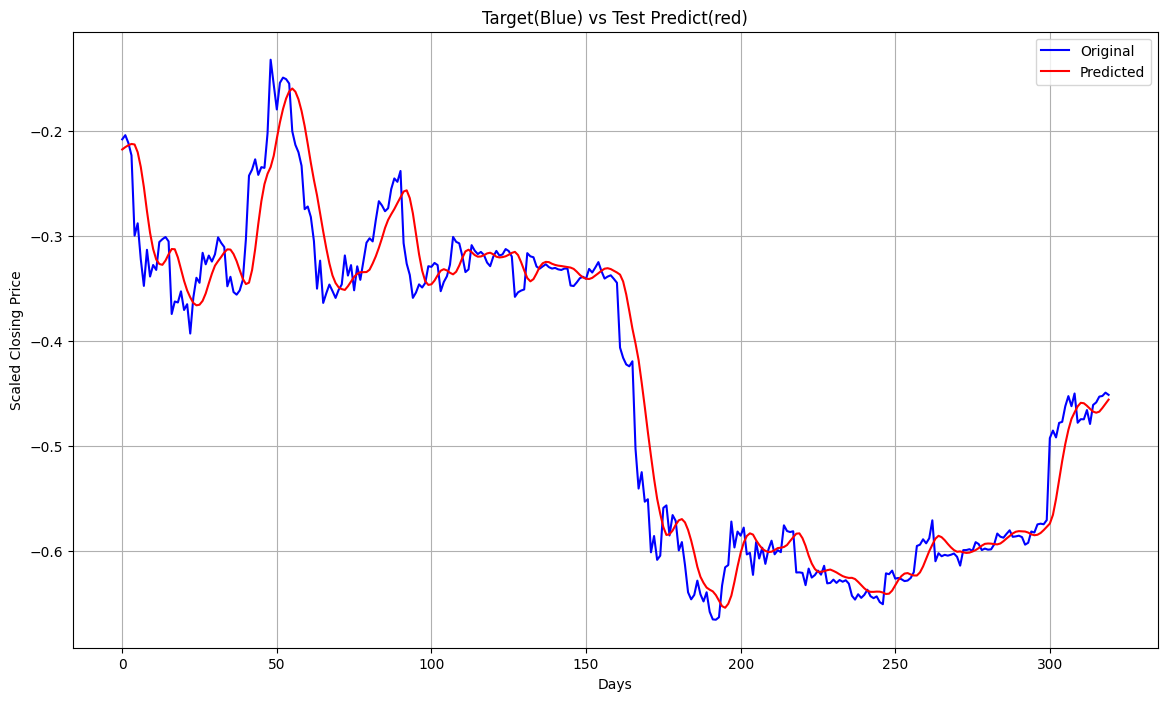

In [13]:
np.random.seed(0)
days = np.arange(320)
scaled_closing_prices = y_test.flatten()
window_size = 7

# Plot original and predicted values
plt.figure(figsize=(14, 8))
plt.plot(days, scaled_closing_prices, label='Original', color='blue')
print(len(predicted_test_results[256]))
plt.plot(days, predicted_test_results[256],label='Predicted',color='red')
plt.title('Target(Blue) vs Test Predict(red)')
plt.xlabel('Days')
plt.ylabel('Scaled Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Calculate RMSE for test data
rmse_results = {}
rmse = np.sqrt(mean_squared_error(y_test, predicted_test_results[256]))
rmse_results[memory_cells] = rmse
print(f'Memory cells: {memory_cells}, RMSE: {rmse}')

Memory cells: 256, RMSE: 0.03287459278411971


In [15]:
#####window size = 3 #######

In [6]:
# Define window size
window_size = 20

# Window the data
X, y = window_data(scaled_data, window_size)

# Ensure X and y have the same length
assert len(X) == len(y)

In [7]:
# Split the data into training and test sets (90:10 ratio)
split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape X for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
# Parameters
memory_cells = [32, 64, 128, 256]
dropout_rate = 0.1
l2_reg = 0.0001
epochs = 20
batch_size = 32
learning_rate = 0.001

# Store results
results = []

# Iterate over different LSTM memory cell sizes
for cells in memory_cells:
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(input_shape=(window_size, 1), units=cells, return_sequences=False,  kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)

    # Evaluate the model on the test set
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    # Append the results
    results.append(test_loss)

C:\Users\MILab\.conda\envs\hr\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


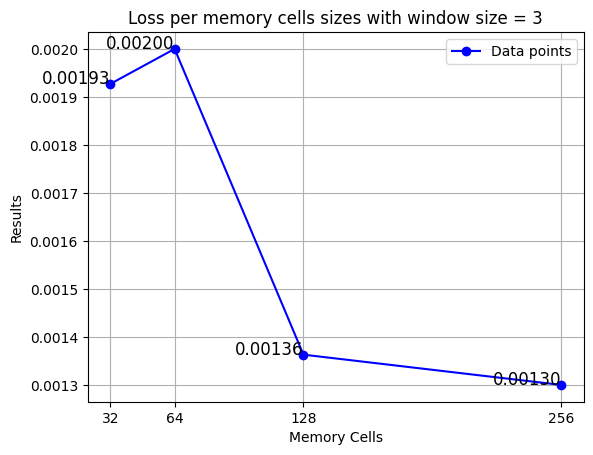

In [9]:
# plot 생성
plt.plot(memory_cells, results, 'bo-', label='Data points')

# 각 포인트 위에 소숫점 둘째 자리까지 값 표시
for i in range(len(results)):
    plt.text(memory_cells[i], results[i], f'{results[i]:.5f}', fontsize=12, ha='right')

# 라벨 및 타이틀 설정
plt.xlabel('Memory Cells')
plt.ylabel('Results')
plt.title('Loss per memory cells sizes with window size = 3')
plt.xticks([32, 64, 128 , 256])
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Parameters
memory_cells = 256
dropout_rate = 0.1
l2_reg = 0.0001
epochs = 20
batch_size = 32
learning_rate = 0.001

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=memory_cells, return_sequences=False, input_shape=(window_size, 1), kernel_regularizer=l2(l2_reg)))
model.add(Dropout(dropout_rate))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Store results
results = []
results.append(test_loss)

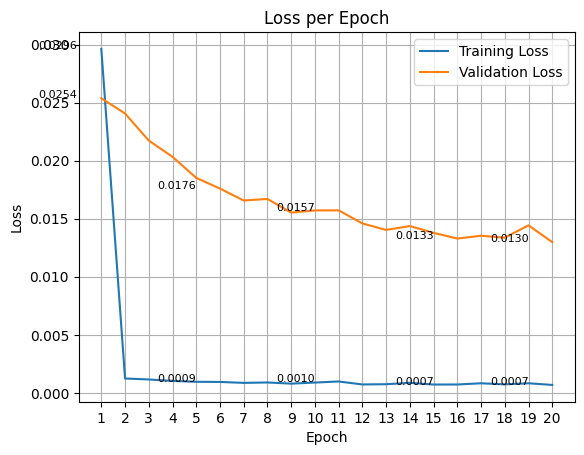

In [11]:
# Plot the training and validation loss
plt.plot(range(1,21),history.history['loss'], label='Training Loss')
plt.plot(range(1,21),history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.xticks(range(1,21))
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
loss_list = history.history['loss']
valloss_list = history.history['val_loss']
# 각 포인트 위에 소숫점 둘째 자리까지 값 표시
for i in range(len(history.history['loss'])):
  if i%5==0 or i ==len(history.history['loss'])-1:
    plt.text(i, history.history['loss'][i], f'{loss_list[i]:.4f}', fontsize=8, ha='right')
    plt.text(i, history.history['val_loss'][i], f'{valloss_list[i]:.4f}', fontsize=8, ha='right')

plt.show()



In [12]:
# Store results
predicted_train_results = {}
predicted_test_results = {}
memory_cells_list = [32, 64, 128, 256]
for memory_cells in memory_cells_list:
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=memory_cells, return_sequences=False, input_shape=(window_size, 1), kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)
    
    # Predict using the model
    predictions = model.predict(X_train)
    predicted_train_results[memory_cells] = predictions.flatten()

# Predict using the model
predictions = model.predict(X_test)
predicted_test_results[256] = predictions.flatten()

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


2862


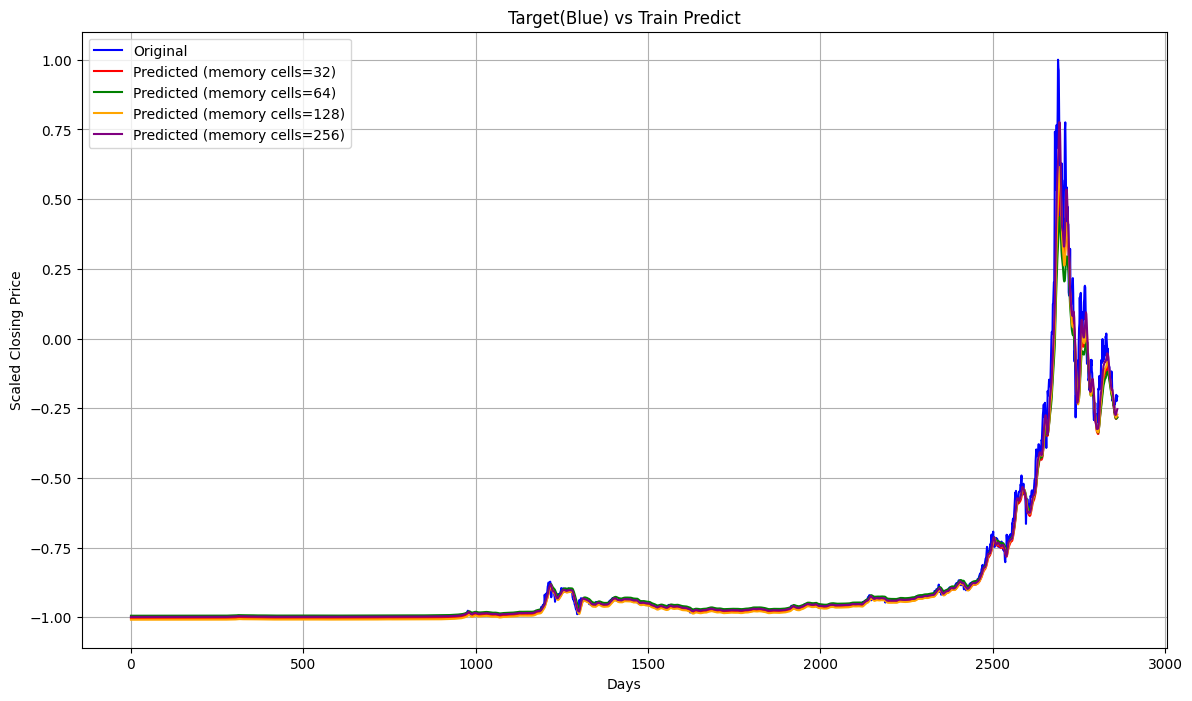

In [14]:
np.random.seed(0)
days = np.arange(2862)
scaled_closing_prices = y_train.flatten()
window_size = 7

# Plot original and predicted values
plt.figure(figsize=(14, 8))
plt.plot(days, scaled_closing_prices, label='Original', color='blue')
print(len(predicted_train_results[memory_cells]))
colors = ['red', 'green', 'orange','purple']
for idx, memory_cells in enumerate(memory_cells_list):
    plt.plot(days, predicted_train_results[memory_cells], label=f'Predicted (memory cells={memory_cells})', color=colors[idx])

plt.title('Target(Blue) vs Train Predict')
plt.xlabel('Days')
plt.ylabel('Scaled Closing Price')
plt.legend()
plt.grid(True)
plt.show()

2862


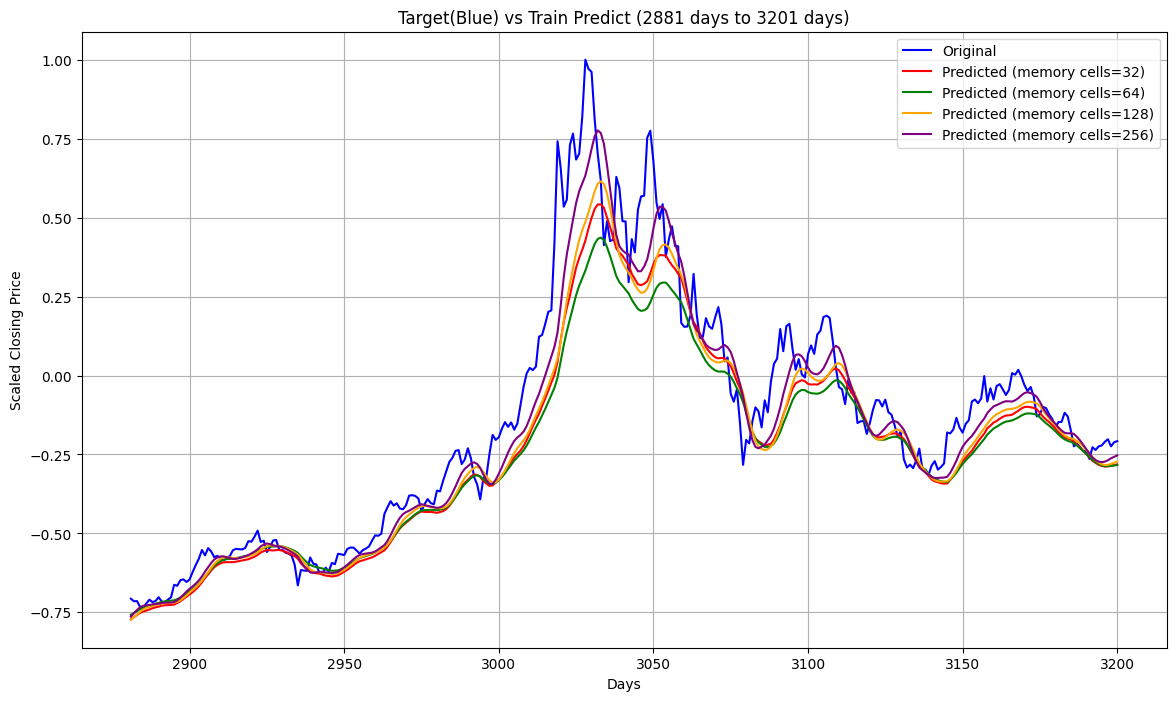

In [18]:
np.random.seed(0)
days = np.arange(2881,3201)
scaled_closing_prices = y_train.flatten()[-320:]

window_size = 7
# Plot original and predicted values
plt.figure(figsize=(14, 8))
plt.plot(days, scaled_closing_prices, label='Original', color='blue')
print(len(predicted_train_results[memory_cells]))
colors = ['red', 'green', 'orange','purple']
for idx, memory_cells in enumerate(memory_cells_list):
    plt.plot(days, predicted_train_results[memory_cells][-320:], label=f'Predicted (memory cells={memory_cells})', color=colors[idx])

plt.title('Target(Blue) vs Train Predict (2881 days to 3201 days)')
plt.xlabel('Days')
plt.ylabel('Scaled Closing Price')
plt.legend()
plt.grid(True)
plt.show()

319


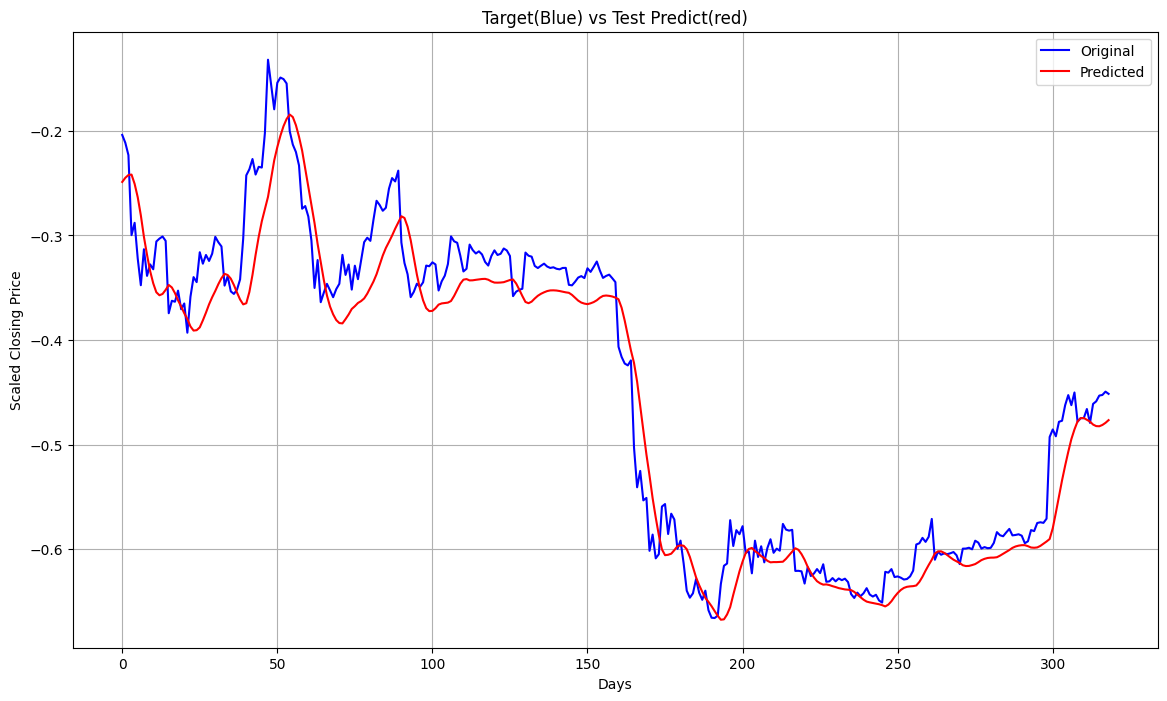

In [23]:
np.random.seed(0)
days = np.arange(319)
scaled_closing_prices = y_test.flatten()
window_size = 20

# Plot original and predicted values
plt.figure(figsize=(14, 8))
plt.plot(days, scaled_closing_prices, label='Original', color='blue')
print(len(predicted_test_results[256]))
plt.plot(days, predicted_test_results[256],label='Predicted',color='red')
plt.title('Target(Blue) vs Test Predict(red)')
plt.xlabel('Days')
plt.ylabel('Scaled Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Calculate RMSE for test data
rmse_results = {}
rmse = np.sqrt(mean_squared_error(y_test, predicted_test_results[256]))
rmse_results[memory_cells] = rmse
print(f'Memory cells: {memory_cells}, RMSE: {rmse}')

Memory cells: 256, RMSE: 0.036450122169407635
